<a href="https://colab.research.google.com/github/Reiniery/Computational-Physics/blob/main/projects/P2_Heat_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P2 Heat Equation

The heat equation is a partial differential equation describing how internal energy is distributed across an object. Use python to solve the heat equation on a square. Maintain the left and right sides of the square at a temperature T1 and the top and bottom sides of the square at a temperature T2 (this is called a Dirichlet boundary condition). Solve for the distribution of the internal energy across the square as a function of time. Plot the distribution as a heat map at three different times. Modify your code to implement a Newmann boundary condition along the top and bottom sides of the square. Again, solve for the distribution of the internal energy across the square as a function of time. Plot the distribution as a heat map at three different times. Describe what your code is doing and what you can learn about the underlying physics.

#Chat GPT Code

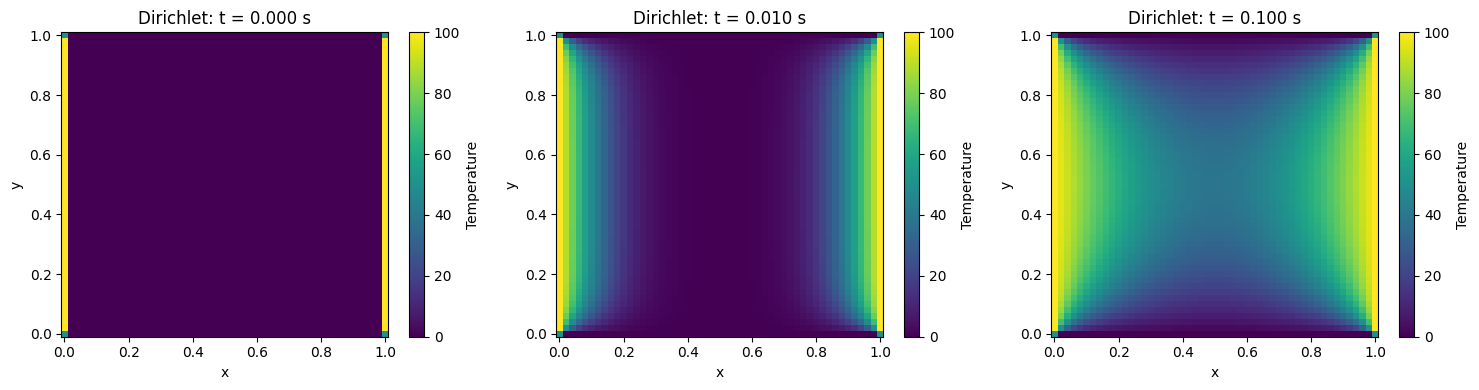

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
alpha = 1.0      # thermal diffusivity
L = 1.0          # size of the square [0,L] x [0,L]
Nx = 51          # number of grid points in x
Ny = 51          # number of grid points in y

dx = L / (Nx - 1)
dy = L / (Ny - 1)

# Stability condition (for 2D explicit scheme with dx = dy):
# dt <= dx^2 / (4 * alpha)
dt = 0.2 * dx**2 / alpha    # safe time step
nt = 1500                   # number of time steps to simulate

# Boundary temperatures (Dirichlet)
T1 = 100.0   # left and right sides
T2 = 0.0     # top and bottom sides

# -------------------------------
# Initial condition
# -------------------------------
# Start with everything at T2 just as a simple example
u = T2 * np.ones((Ny, Nx))

# You could also start with something else, e.g. a hot spot inside:
# x = np.linspace(0, L, Nx)
# y = np.linspace(0, L, Ny)
# X, Y = np.meshgrid(x, y)
# u = 20.0 * np.exp(-((X-0.5)**2 + (Y-0.5)**2)/0.02) + T2

# Apply Dirichlet boundary conditions at t=0
u[:, 0]  = T1   # left
u[:, -1] = T1   # right
u[0, :]  = T2   # bottom
u[-1, :] = T2   # top

# Optional: define corners as an average (not strictly necessary)
u[0, 0]   = 0.5 * (T1 + T2)
u[0, -1]  = 0.5 * (T1 + T2)
u[-1, 0]  = 0.5 * (T1 + T2)
u[-1, -1] = 0.5 * (T1 + T2)

# -------------------------------
# Time integration (explicit Euler)
# -------------------------------
snap_times = [0.0, 0.01, 0.1]  # times we want to plot
snapshots = []
times = []

for n in range(nt):
    t = n * dt

    # Save a copy of u at chosen times (closest steps)
    for target_t in snap_times:
        if abs(t - target_t) < 0.5 * dt:  # within half a step
            if target_t not in times:
                snapshots.append(u.copy())
                times.append(target_t)

    # Compute next time step
    u_new = u.copy()

    # Interior update using finite differences:
    # u_{i,j}^{n+1} = u_{i,j}^n + dt * alpha * (u_xx + u_yy)
    u_new[1:-1, 1:-1] = (
        u[1:-1, 1:-1]
        + alpha * dt * (
            (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, 0:-2]) / dx**2 +
            (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[0:-2, 1:-1]) / dy**2
        )
    )

    # Reapply Dirichlet boundary conditions
    u_new[:, 0]  = T1   # left
    u_new[:, -1] = T1   # right
    u_new[0, :]  = T2   # bottom
    u_new[-1, :] = T2   # top

    # (optional) corners
    u_new[0, 0]   = 0.5 * (T1 + T2)
    u_new[0, -1]  = 0.5 * (T1 + T2)
    u_new[-1, 0]  = 0.5 * (T1 + T2)
    u_new[-1, -1] = 0.5 * (T1 + T2)

    # Update solution
    u = u_new

# Also save final state if not already saved
final_t = nt * dt
if final_t not in times:
    snapshots.append(u.copy())
    times.append(final_t)
    snap_times.append(final_t)

# -------------------------------
# Plot heat maps at three times
# -------------------------------
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

# Choose 3 times to show (take first 3 snaps)
# You can modify which ones you want
plot_indices = [0, 1, 2]  # adjust if needed

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, idx in zip(axes, plot_indices):
    c = ax.pcolormesh(X, Y, snapshots[idx], shading='auto')
    ax.set_title(f"Dirichlet: t = {snap_times[idx]:.3f} s")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(c, ax=ax, label="Temperature")

plt.tight_layout()
plt.show()


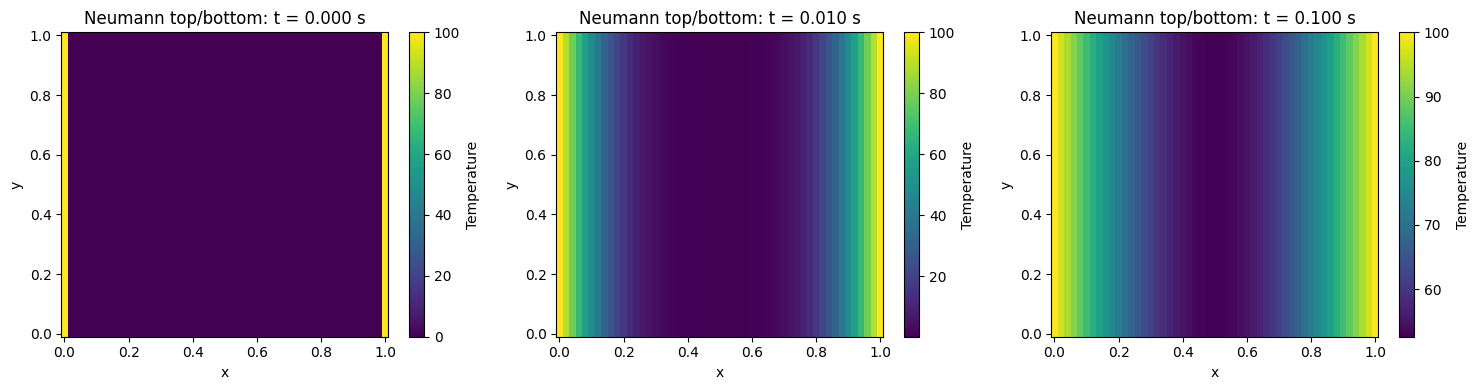

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
alpha = 1.0
L = 1.0
Nx = 51
Ny = 51

dx = L / (Nx - 1)
dy = L / (Ny - 1)
dt = 0.2 * dx**2 / alpha
nt = 1500

T1 = 100.0   # left/right sides fixed
# Top & bottom will be Neumann (insulated), not fixed T2

# -------------------------------
# Initial condition
# -------------------------------
u = np.zeros((Ny, Nx))  # start everything at 0 for simplicity

# You can still add some initial hot spot if you want:
# x = np.linspace(0, L, Nx)
# y = np.linspace(0, L, Ny)
# X, Y = np.meshgrid(x, y)
# u = 20.0 * np.exp(-((X-0.5)**2 + (Y-0.5)**2)/0.02)

# Dirichlet left/right
u[:, 0]  = T1
u[:, -1] = T1

# -------------------------------
# Time integration
# -------------------------------
snap_times = [0.0, 0.01, 0.1]
snapshots = []
times = []

for n in range(nt):
    t = n * dt

    # Save snapshots
    for target_t in snap_times:
        if abs(t - target_t) < 0.5 * dt:
            if target_t not in times:
                snapshots.append(u.copy())
                times.append(target_t)

    u_new = u.copy()

    # Interior update
    u_new[1:-1, 1:-1] = (
        u[1:-1, 1:-1]
        + alpha * dt * (
            (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, 0:-2]) / dx**2 +
            (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[0:-2, 1:-1]) / dy**2
        )
    )

    # Apply Dirichlet BC on left/right
    u_new[:, 0]  = T1
    u_new[:, -1] = T1

    # Apply Neumann BC (zero flux) on top and bottom:
    # bottom row equal to the row above
    u_new[0, :] = u_new[1, :]
    # top row equal to the row below
    u_new[-1, :] = u_new[-2, :]

    u = u_new

# Save final state if needed
final_t = nt * dt
if final_t not in times:
    snapshots.append(u.copy())
    times.append(final_t)
    snap_times.append(final_t)

# -------------------------------
# Plot heat maps at three times
# -------------------------------
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

plot_indices = [0, 1, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, idx in zip(axes, plot_indices):

    c = ax.pcolormesh(X, Y, snapshots[idx], shading='auto')
    ax.set_title(f"Neumann top/bottom: t = {snap_times[idx]:.3f} s")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(c, ax=ax, label="Temperature")

plt.tight_layout()
plt.show()


# Reflection on Chatgpt code:

I gave ChatGPT the prompt on 3 different times. On the first day, ChatGPT did not give me the code. It outputted a set of graphs that look like the ones above. The second time, it gave me fully working code, however, it was organized into functions. This last time, it produced the code above, which was the easiest to understand.

Takeaway: Chatgpt isn't always consistant with its method. However, in this scenario, it produced the results asked for in the prompt




 # What is Happening
 Given the results above, I assume the code works because ChatGPT outputted a few plots. Ultimately, I am still confused on what is going both conceptually and computionally. To understand, I solve the problem myself and compare it to ChatGPT's results.

# My Work

The Heat Equation: $$ \frac{∂u}{∂t}= \alpha (\frac{∂^2u}{∂^2x}+\frac{∂^2u}{∂^2y}+\frac{∂^2u}{∂^2z})$$

We are working with a square, so we can set $$\frac{∂^2u}{∂^2z}=0$$ and use

$$ \frac{∂u}{∂t}= \alpha (\frac{∂^2u}{∂^2x}+\frac{∂^2u}{∂^2y})$$ to solve our problem.

`

# Converting to ODE

In order to solve, we need to make this equation into ODE. We can approximate second order derivative with:
$$ f^{''}≈\frac{f(x+h)-2f(x)+f(x-h)}{h^2} $$

So our approximations become:



$$ \frac{∂^2u}{∂^2x} =\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{Δ x^2}  )$$

$$ \frac{∂^2u}{∂^2y} =\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{\Delta y^2}  )$$

where
$i$: x-coordinate, $j$:y-coordinate



In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def approx_2nd_deriv(u, dx, dy):

    ny,nx = u.shape#len of y,x grid

    grid=np.zeros((ny,nx)) #spatial coordinates


    for i in range(1,ny-1):
        for j in range(1,nx-1):
            u_xx=(u[i+1][j] - 2*u[i][j] + u[i-1][j])/dx**2
            u_yy=(u[i][j+1] - 2*u[i][j] + u[i][j-1])/dy**2

            grid[i][j]=u_xx+u_yy
    return grid


#---------------
# parameters
#---------------

Lx,Ly=10,10 #size of swaure/rectangel
nx,ny= 100,100 #number of points

dx= Lx/(nx-1)
dy=Ly/(ny-1)

T1= 100
T2= 0.0

#starting sqaure
u0=np.zeros((ny,nx))

u0[:,0] = T1 #left
u0[:,-1] = T1 #right
u0[0,:]= T2 #top
u0[-1,:]=T2 #bottom

u0=u0.flatten()

def heat_eq(t,U):
    u=U.reshape((ny,nx))

    u[:,0] = T1 #left
    u[:,-1] = T1 #right
    u[0,:]= T2 #top
    u[-1,:]=T2 #bottom

    approx=approx_2nd_deriv(u,dx,dy)

    dudt= alpha*approx

    dudt[:, 0]  = 0.0
    dudt[:, -1] = 0.0
    dudt[0, :]  = 0.0
    dudt[-1, :] = 0.0

    return dudt.flatten()

t_start=0
t_end=50
t_eval=[0.0, 0.010,.1]

sol=solve_ivp(heat_eq, (t_start, t_end,), u0, method='RK45', t_eval=t_eval)







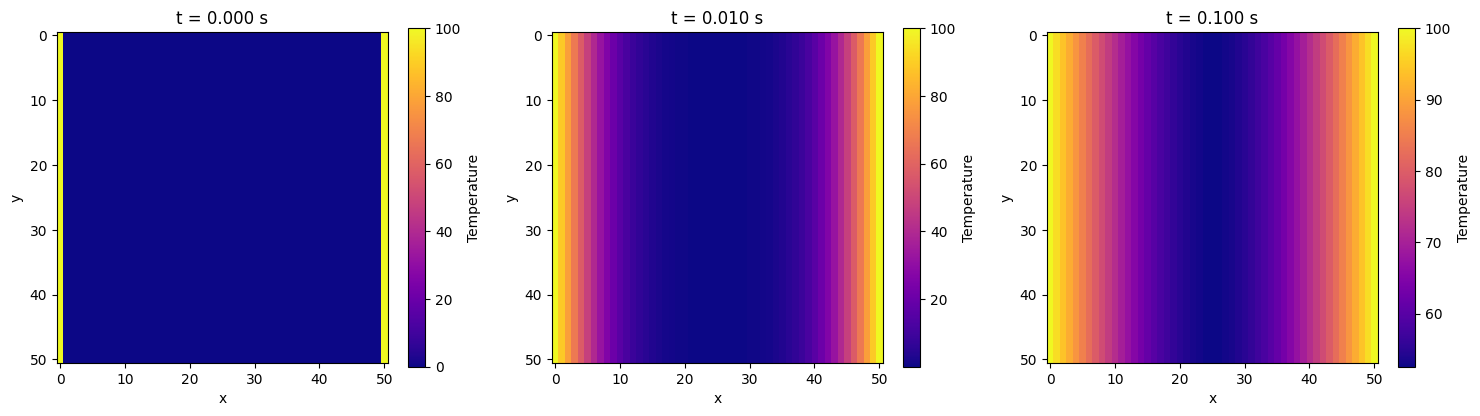

In [59]:
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(1, len(t_eval), figsize=(15, 4))

for k, (ax, t) in enumerate(zip(axes, t_eval)):
    U_t = sol.y[:, k].reshape((ny, nx))   # solution at time t_eval[k]
    c= ax.imshow((snapshots[k]), 'plasma')
    ax.set_title(f"t = {t:.3f} s")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(c, ax=ax, label="Temperature",cmap='plasma')

plt.tight_layout()
plt.show()


# Newmann boundary condition





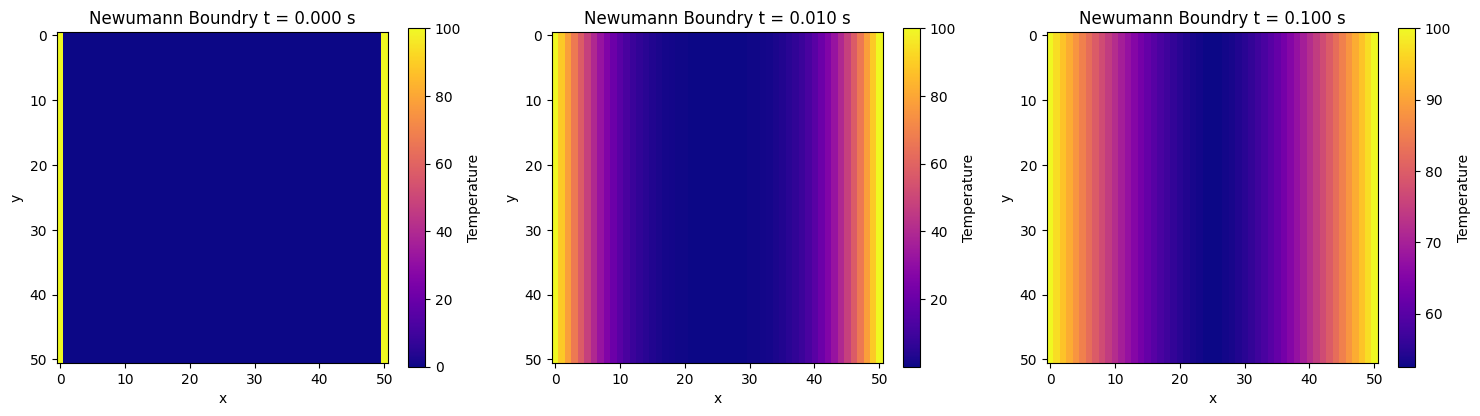

In [56]:
def heat_eq(t,U):
    u=U.reshape((ny,nx))

    u[:,0] = T1 #left
    u[:,-1] = T1 #right

    u[0,:]= u[1,:] #top
    u[-1,:]=u[-2,:] #bottom

    approx=approx_2nd_deriv(u,dx,dy)

    dudt= alpha*approx

    dudt[:, 0]  = 0.0
    dudt[:, -1] = 0.0
    dudt[0, :]  = 0.0
    dudt[-1, :] = 0.0

    return dudt.flatten()

t_start=0
t_end=1
t_eval=[0.0, 0.010,.1]

sol=solve_ivp(heat_eq, (t_start, t_end,), u0, method='RK45', t_eval=t_eval)



x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(1, len(t_eval), figsize=(15, 4))

for k, (ax, t) in enumerate(zip(axes, t_eval)):
    U_t = sol.y[:, k].reshape((ny, nx))   # solution at time t_eval[k]
    c= ax.imshow((snapshots[k]), 'plasma')
    ax.set_title(f"Newumann Boundry t = {t:.3f} s")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(c, ax=ax, label="Temperature",cmap='plasma')

plt.tight_layout()
plt.show()

